In [3]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import gym
# Trying out if this works for others. from gym import spaces had some issues
import gym.spaces as spaces
import threading
import math
import matplotlib
from tcl_env_dqn_1 import *


In [4]:
import pickle

# dia 
# Load the lists from the file
foldername= "Optimizer results 56"
with open(f"{foldername}/lists.pkl", "rb") as f:
    SOCS_RENDER, LOADS_RENDER, PRICE_RENDER, BATTERY_RENDER, ENERGY_GENERATED_RENDER, ENERGY_SOLD_RENDER, ENERGY_BOUGHT_RENDER, GRID_PRICES_BUY_RENDER, GRID_PRICES_SELL_RENDER, TCL_CONTROL_RENDER, TCL_CONSUMPTION_RENDER, TOTAL_CONSUMPTION_RENDER, TEMP_RENDER = pickle.load(f)

    

iterations: 24


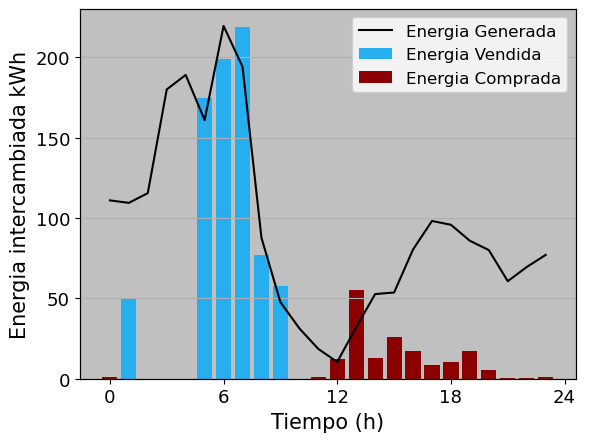

In [5]:
iterations = 24
fontsize1 = 12
fontsize2 = 15
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13)
ax = plt.axes()
ax.set_facecolor("silver")
ax.yaxis.grid(True)
# ax.axis(ymin=0,ymax=610)
print('iterations:', iterations)
ax.bar(x=np.array(np.arange(iterations)),height=np.array(ENERGY_SOLD_RENDER),color="#27aeef", width=0.8)
ax.bar(x=np.array(np.arange(iterations)),height=np.array(ENERGY_BOUGHT_RENDER),color='darkred', width=0.8)
ax.plot(np.nan, color='k')
ax1=ax.twinx()
ax1.plot(np.array(ENERGY_GENERATED_RENDER),color='k')
ax.set_xticks(np.arange(24.1, step=6))
ax.set_xlabel("Tiempo (h)", fontsize=fontsize2)
ax.set_ylabel("Energia intercambiada kWh", fontsize=fontsize2)
ax.legend(['Energia Generada','Energia Vendida', 'Energia Comprada'],loc='upper right',fontsize=fontsize1)
# pyplot.show()


#ax1.plot(np.array(GRID_PRICES_SELL_RENDER), color='green')
ax1.set_ylabel(None)
ax1.set_yticks([])
#ax1.legend(['Energia Generada'],loc='upper left', fontsize=fontsize1)
#ax.set_zorder(1)
plt.savefig(f"{foldername}/energia_int", bbox_inches='tight')
plt.show()
            

## Optimizador

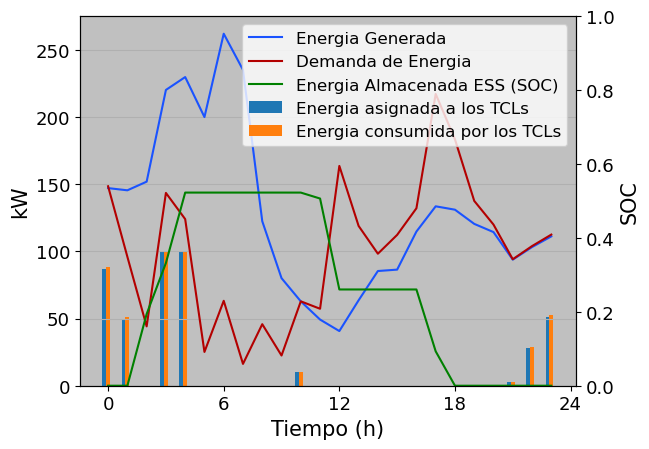

In [6]:
foldername= "Optimizer results 56"
with open(f"{foldername}/lists.pkl", "rb") as f:
    SOCS_RENDER, LOADS_RENDER, PRICE_RENDER, BATTERY_RENDER, ENERGY_GENERATED_RENDER, ENERGY_SOLD_RENDER, ENERGY_BOUGHT_RENDER, GRID_PRICES_BUY_RENDER, GRID_PRICES_SELL_RENDER, TCL_CONTROL_RENDER, TCL_CONSUMPTION_RENDER, TOTAL_CONSUMPTION_RENDER, TEMP_RENDER = pickle.load(f)

ax = plt.axes()
#ax = plt.subplot(2, 1, 2)
ax.set_facecolor("silver")
ax.set_ylabel("kW",fontsize=fontsize2)
ax.set_xlabel("Tiempo (h)", fontsize=fontsize2)
ax1 = ax.twinx()
ax1.plot(np.array(BATTERY_RENDER), color='g')
ax1.set_ylim([0,1])
ax.yaxis.grid(True)
ax.plot(ENERGY_GENERATED_RENDER, color='#1a53ff', label="Energia Generada")
ax.plot(np.array(TOTAL_CONSUMPTION_RENDER), color='#b30000', label="Demanda de Energia")
ax.plot(np.nan, color='g', label="Energia Almacenada ESS (SOC)")
ax.bar(x=np.array(np.arange(iterations)) - 0.2, height=TCL_CONTROL_RENDER, width=0.2, label= 'Energia asignada a los TCLs')
ax.bar(x=np.array(np.arange(iterations)), height=TCL_CONSUMPTION_RENDER, width=0.2, label = 'Energia consumida por los TCLs')
ax1.set_ylabel("SOC",fontsize=fontsize2)
#ax1.legend(['Energia Almacenada'],fontsize=fontsize1, loc="upper left")
plt.xticks( np.array(np.arange(iterations+0.1,step=6)), fontsize=12.5, rotation=90)
#plt.title("Energia asignada a y consumida por los TCLs",fontsize=fontsize2)
ax.legend(fontsize=fontsize1, loc="upper right")
plt.xlabel("Tiempo (h)",fontsize=fontsize2)
#plt.ylabel("kW", fontsize=fontsize2)

plt.savefig(f"{foldername}/energyallocated-1", bbox_inches='tight')
plt.show()

## Algoritmo

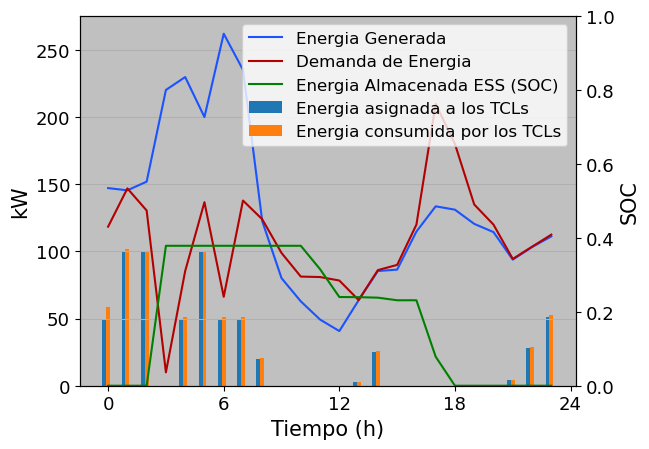

In [16]:
foldername= "Dia 56"
with open(f"{foldername}/lists.pkl", "rb") as f:
    SOCS_RENDER1, LOADS_RENDER1, PRICE_RENDER1, BATTERY_RENDER1, ENERGY_GENERATED_RENDER1, ENERGY_SOLD_RENDER1, ENERGY_BOUGHT_RENDER1, GRID_PRICES_BUY_RENDER1, GRID_PRICES_SELL_RENDER1, TCL_CONTROL_RENDER1, TCL_CONSUMPTION_RENDER1, TOTAL_CONSUMPTION_RENDER1, TEMP_RENDER1 = pickle.load(f)

ax = plt.axes()
#ax = plt.subplot(2, 1, 2)
ax.set_facecolor("silver")
ax.set_ylabel("kW",fontsize=fontsize2)
ax.set_xlabel("Tiempo (h)", fontsize=fontsize2)
ax1 = ax.twinx()
ax1.plot(np.array(BATTERY_RENDER1), color='g')
ax1.set_ylim([0,1])
ax.yaxis.grid(True)
ax.plot(ENERGY_GENERATED_RENDER1, color='#1a53ff', label="Energia Generada")
ax.plot(np.array(TOTAL_CONSUMPTION_RENDER1), color='#b30000', label="Demanda de Energia")
ax.plot(np.nan, color='g', label="Energia Almacenada ESS (SOC)")
ax.bar(x=np.array(np.arange(iterations)) - 0.2, height=TCL_CONTROL_RENDER1, width=0.2, label= 'Energia asignada a los TCLs')
ax.bar(x=np.array(np.arange(iterations)), height=TCL_CONSUMPTION_RENDER1, width=0.2, label = 'Energia consumida por los TCLs')
ax1.set_ylabel("SOC",fontsize=fontsize2)
#ax1.legend(['Energia Almacenada'],fontsize=fontsize1, loc="upper left")
plt.xticks( np.array(np.arange(iterations+0.1,step=6)), fontsize=12.5, rotation=90)
#plt.title("Energia asignada a y consumida por los TCLs",fontsize=fontsize2)
ax.legend(fontsize=fontsize1, loc="upper right")
plt.xlabel("Tiempo (h)",fontsize=fontsize2)
#plt.ylabel("kW", fontsize=fontsize2)

plt.savefig(f"{foldername}/energyallocated-1", bbox_inches='tight')
plt.show()

iterations: 24
iterations: 24


Text(0.02, 0.5, 'Energia intercambiada kWh')

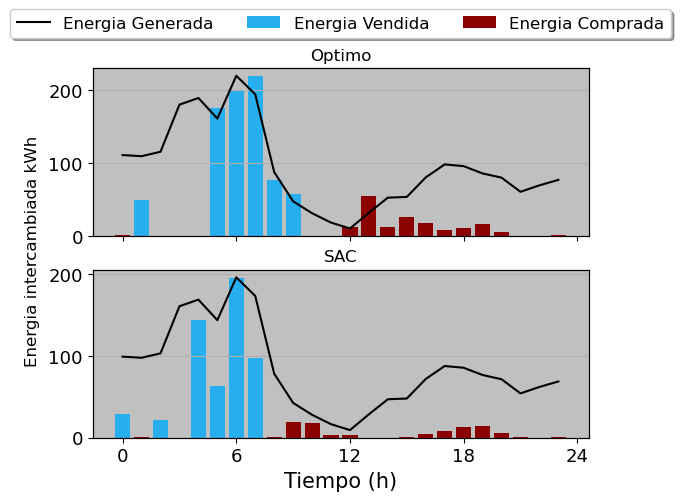

In [5]:
foldername= "Dia 56"
with open(f"{foldername}/lists.pkl", "rb") as f:
    SOCS_RENDER1, LOADS_RENDER1, PRICE_RENDER1, BATTERY_RENDER1, ENERGY_GENERATED_RENDER1, ENERGY_SOLD_RENDER1, ENERGY_BOUGHT_RENDER1, GRID_PRICES_BUY_RENDER1, GRID_PRICES_SELL_RENDER1, TCL_CONTROL_RENDER1, TCL_CONSUMPTION_RENDER1, TOTAL_CONSUMPTION_RENDER1, TEMP_RENDER1 = pickle.load(f)

fig, axs = plt.subplots(2,1, sharex=True)
ax, ax2 = axs
ax.set_title("Optimo")
ax.set_facecolor("silver")
ax.yaxis.grid(True)
# ax.axis(ymin=0,ymax=610)
print('iterations:', iterations)
ax.bar(x=np.array(np.arange(iterations)),height=np.array(ENERGY_SOLD_RENDER),color="#27aeef", width=0.8)
ax.bar(x=np.array(np.arange(iterations)),height=np.array(ENERGY_BOUGHT_RENDER),color='darkred', width=0.8)
ax.plot(np.nan, color='k')
ax1=ax.twinx()
ax1.plot(np.array(ENERGY_GENERATED_RENDER),color='k')
ax.set_xticks(np.arange(24.1, step=6),xticklabels=[],labelbottom=False)
#ax.set_xlabel("Tiempo (h)", fontsize=fontsize2)

ax.legend(['Energia Generada','Energia Vendida', 'Energia Comprada'],loc='upper center', bbox_to_anchor=(0.5, 1.4),
          fancybox=True, shadow=True, ncol=3,fontsize=fontsize1)
ax1.set_ylabel(None)
ax1.set_yticks([])

ax2 = plt.subplot(2,1,2)
ax2.set_title("SAC")
ax2.set_facecolor("silver")
ax2.yaxis.grid(True)
# ax.axis(ymin=0,ymax=610)
print('iterations:', iterations)
ax2.bar(x=np.array(np.arange(iterations)),height=np.array(ENERGY_SOLD_RENDER1),color="#27aeef", width=0.8)
ax2.bar(x=np.array(np.arange(iterations)),height=np.array(ENERGY_BOUGHT_RENDER1),color='darkred', width=0.8)
ax2.plot(np.nan, color='k')
ax21=ax2.twinx()
ax21.plot(np.array(ENERGY_GENERATED_RENDER1),color='k')
ax2.set_xticks(np.arange(24.1, step=6))
ax2.set_xlabel("Tiempo (h)", fontsize=fontsize2)
#ax.set_ylabel("Energia intercambiada kWh", fontsize=fontsize2)
ax21.set_ylabel(None)
ax21.set_yticks([])

fig.supylabel('Energia intercambiada kWh')

Text(0.02, 0.5, 'Energia kWh')

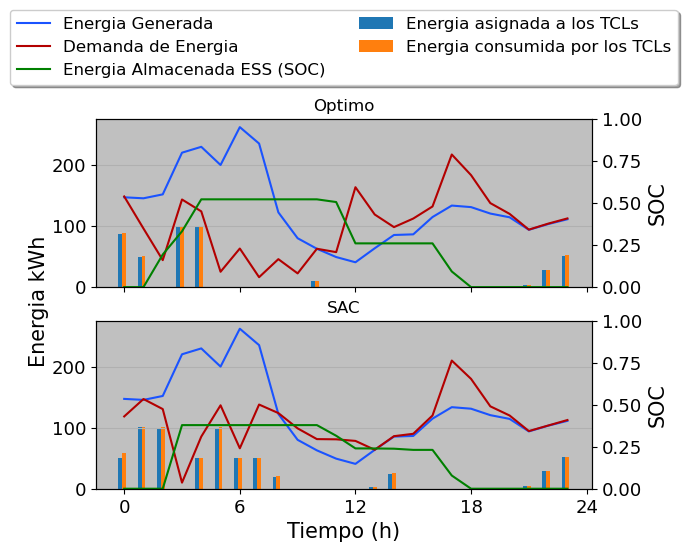

In [21]:
fig, axs = plt.subplots(2,1, sharex=True)
ax, ax2 = axs
#ax = plt.subplot(2, 1, 2)
ax.set_facecolor("silver")
ax.set_title("Optimo")
ax1 = ax.twinx()
ax1.plot(np.array(BATTERY_RENDER), color='g')
ax1.set_ylim([0,1])
ax.yaxis.grid(True)
ax.plot(ENERGY_GENERATED_RENDER, color='#1a53ff', label="Energia Generada")
ax.plot(np.array(TOTAL_CONSUMPTION_RENDER), color='#b30000', label="Demanda de Energia")
ax.plot(np.nan, color='g', label="Energia Almacenada ESS (SOC)")
ax.bar(x=np.array(np.arange(iterations)) - 0.2, height=TCL_CONTROL_RENDER, width=0.2, label= 'Energia asignada a los TCLs')
ax.bar(x=np.array(np.arange(iterations)), height=TCL_CONSUMPTION_RENDER, width=0.2, label = 'Energia consumida por los TCLs')
ax1.set_ylabel("SOC",fontsize=fontsize2)
#ax1.legend(['Energia Almacenada'],fontsize=fontsize1, loc="upper left")
#plt.title("Energia asignada a y consumida por los TCLs",fontsize=fontsize2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.7),
          fancybox=True, shadow=True, ncol=2,fontsize=fontsize1)
#plt.ylabel("kW", fontsize=fontsize2)
ax2.set_title("SAC")
ax2.set_facecolor("silver")
ax2.set_xlabel("Tiempo (h)", fontsize=fontsize2)
ax21 = ax2.twinx()
ax21.plot(np.array(BATTERY_RENDER1), color='g')
ax21.set_ylim([0,1])
ax2.yaxis.grid(True)
ax2.plot(ENERGY_GENERATED_RENDER1, color='#1a53ff', label="Energia Generada")
ax2.plot(np.array(TOTAL_CONSUMPTION_RENDER1), color='#b30000', label="Demanda de Energia")
ax2.plot(np.nan, color='g', label="Energia Almacenada ESS (SOC)")
ax2.bar(x=np.array(np.arange(iterations)) - 0.2, height=TCL_CONTROL_RENDER1, width=0.2, label= 'Energia asignada a los TCLs')
ax2.bar(x=np.array(np.arange(iterations)), height=TCL_CONSUMPTION_RENDER1, width=0.2, label = 'Energia consumida por los TCLs')
ax21.set_ylabel("SOC",fontsize=fontsize2)
#ax1.legend(['Energia Almacenada'],fontsize=fontsize1, loc="upper left")
plt.xticks( np.array(np.arange(iterations+0.1,step=6)), fontsize=12.5, rotation=90)
#plt.title("Energia asignada a y consumida por los TCLs",fontsize=fontsize2)
#ax2.legend(fontsize=fontsize1, loc="upper right")
plt.xlabel("Tiempo (h)",fontsize=fontsize2)
#plt.ylabel("kW", fontsize=fontsize2)

fig.supylabel('Energia kWh',fontsize=fontsize2)
#fig.supylabel('SOC')

Lo unico que se me ocurrio aparte de eso es fue:

Respecto a futuro trabajo:
- Se podria tratar de hacer uso de la diversidad de los dias durante el entrenamiento.
- Se podria trabajar con redes neuronales que traten de predecir las tendencias de consumo, y los cambios de los precios.